## Guideline to decide the type of Naive Bayes Algo
### If your features are mostly continuous, start with GaussianNB.
### If your features are counts or frequencies, use MultinomialNB.
### If your features are categorical, use CategoricalNB.

## Iris Dataset

Accuracy: 1.0


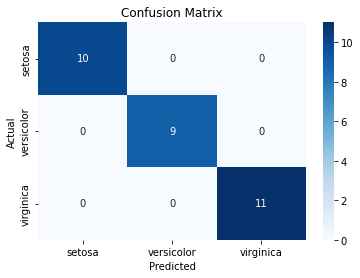

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Play Tennis Dataset

Accuracy: 0.3333333333333333


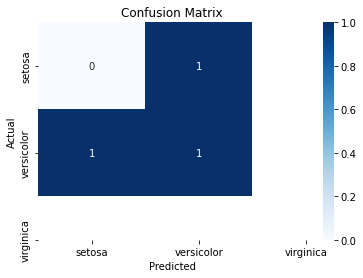

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('PlayTennis/PlayTennis.csv') 

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

# Separate features and target variable
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Categorical Naive Bayes classifier
model = CategoricalNB()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## Large Movie Review Dataset dataset classification 

In [17]:
# https://github.com/satkr7/IMDB-sentiment-analysis-using-naive-bayes/blob/master/movie_review.ipynb
#IMPORT ALL NECCESSARY PACKAGES
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score

In [21]:
data = pd.read_csv("archive/imdb_master.csv", encoding="ISO-8859-1")


In [30]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english') 

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [ ]:
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in data['review'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['label'].values)[i] == "pos": 
                        all_positive_words.append(s) 
                    if(data['label'].values)[i] == "neg":
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [ ]:
data['cleaned_review']=final_string

In [ ]:
def posneg(x):
    if x=="neg":
        return 0
    elif x=="pos":
        return 1
    return x

filtered_score = data["label"].map(posneg)
data["score"] = filtered_score

In [ ]:
test_data = data[:25000]
train_data = data[25000:50000]

In [ ]:
X_train = train_data["cleaned_review"]
y_train = train_data["score"]

X_test = test_data["cleaned_review"]
y_test = test_data["score"]

In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [4]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(X_train.values)
tf_idf_test = tf_idf_vect.transform(X_test.values)

NameError: name 'TfidfVectorizer' is not defined

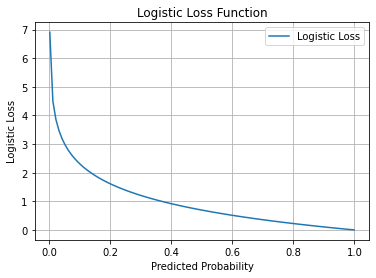

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Logistic loss function
def logistic_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate a range of predicted probabilities (between 0 and 1)
y_pred_values = np.linspace(0.001, 0.999, 100)

# Set a true label (0 or 1, choose one)
y_true_label = 1

# Compute the logistic loss for the given true label
loss_values = logistic_loss(y_true_label, y_pred_values)

# Plot the logistic loss function
plt.plot(y_pred_values, loss_values, label='Logistic Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Logistic Loss')
plt.title('Logistic Loss Function')
plt.legend()
plt.grid(True)
plt.show()


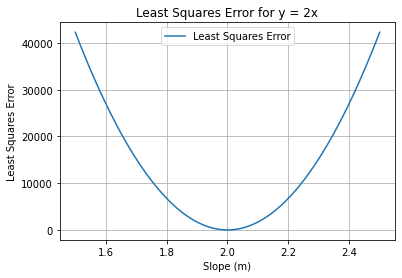

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Least squares error function
def least_squares_error(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred)**2)

# Generate a range of slope values (assuming y = mx)
slope_values = np.linspace(1.5, 2.5, 100)

# Set true values based on y = 2x
x_values = np.arange(1, 101)  # Assuming x values from 1 to 100
y_true_values = 2 * x_values

# Compute the least squares error for each slope value
error_values = [least_squares_error(y_true_values, slope * x_values) for slope in slope_values]

# Plot the least squares error for y = 2x
plt.plot(slope_values, error_values, label='Least Squares Error')
plt.xlabel('Slope (m)')
plt.ylabel('Least Squares Error')
plt.title('Least Squares Error for y = 2x')
plt.legend()
plt.grid(True)
plt.show()


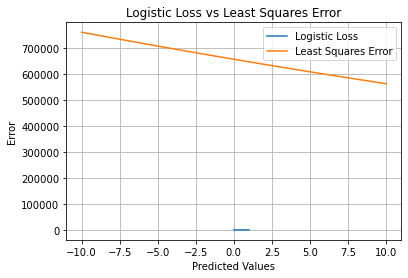

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Logistic loss function
def logistic_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Least squares error function
def least_squares_error(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred)**2)

# Generate a range of predicted probabilities (for logistic loss)
y_pred_values_logistic = np.linspace(0.001, 0.999, 100)

# Set a true label (for logistic loss)
y_true_label_logistic = 1

# Compute the logistic loss for the given true label
logistic_loss_values = logistic_loss(y_true_label_logistic, y_pred_values_logistic)

# Generate a range of predicted values (for least squares error)
y_pred_values_least_squares = np.linspace(-10, 10, 100)

# Set true values (for least squares error)
y_true_values_least_squares = 2 * np.arange(100)  # Assuming y = 2x for simplicity

# Compute the least squares error for each predicted value
least_squares_error_values = [least_squares_error(y_true_values_least_squares, y_pred) for y_pred in y_pred_values_least_squares]

# Plot both error functions on the same plot
plt.plot(y_pred_values_logistic, logistic_loss_values, label='Logistic Loss')
plt.plot(y_pred_values_least_squares, least_squares_error_values, label='Least Squares Error')
plt.xlabel('Predicted Values')
plt.ylabel('Error')
plt.title('Logistic Loss vs Least Squares Error')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_93314/3593235006.py:6: RuntimeWarning: invalid value encountered in log
  return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


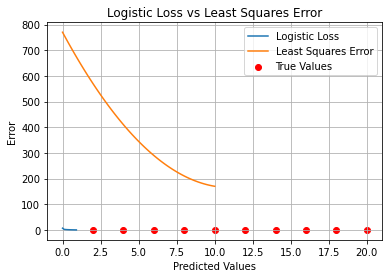

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Logistic loss function
def logistic_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Least squares error function
def least_squares_error(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred)**2)

# Given data
x_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_values = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  # Assuming the correct value is 10

# Set true label
y_true_label = 1

# Compute predicted values for logistic and linear models
y_pred_values = np.linspace(0.001, 10, 100)

# Compute the logistic loss for the given true label
logistic_loss_values = logistic_loss(y_true_label, y_pred_values)

# Compute the least squares error for each predicted value
least_squares_error_values = [least_squares_error(y_values, y_pred) for y_pred in y_pred_values]

# Plot both error functions on the same plot
plt.plot(y_pred_values, logistic_loss_values, label='Logistic Loss')
plt.plot(y_pred_values, least_squares_error_values, label='Least Squares Error')
plt.scatter(y_values, [y_true_label] * len(y_values), color='red', marker='o', label='True Values')
plt.xlabel('Predicted Values')
plt.ylabel('Error')
plt.title('Logistic Loss vs Least Squares Error')
plt.legend()
plt.grid(True)
plt.show()
